# Case Study - Credit Card
Let's proceed with the tutorial on clustering analysis using the "Credit Card" dataset. We will use two popular clustering algorithms: K-means and K-medoids. We will compare these two methods based on their performance and clusters they form.

## Setup
Dataset Loading and Exploration

In [1]:
!pip install scikit-learn-extra

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score

## Load Dataset

In [3]:
df = pd.read_csv("Credit_Card_Dataset_for_Clustering.csv", delimiter=',')
nRow, nCol = df.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 8950 rows and 18 columns


## Exploratory Analysis

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [8]:
print(df.describe(include='all'))

       CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C10001           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  

## Cleanup NaNs

In [9]:
df = df.dropna()

## Split Features and Target

### Features

Try with less features than the full dataset

In [10]:
X = df.iloc[:, 1:4]
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES
0,40.900749,0.818182,95.40
1,3202.467416,0.909091,0.00
2,2495.148862,1.000000,773.17
4,817.714335,1.000000,16.00
5,1809.828751,1.000000,1333.28


##  Data Preprocessing
Before applying clustering algorithms, we need to preprocess the data to standardize the features.

In [16]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.74462486 -0.37004679 -0.42918384]
 [ 0.76415211  0.06767893 -0.47320819]
 [ 0.42660239  0.50540465 -0.11641251]
 ...
 [-0.75297728 -0.29709491 -0.40657175]
 [-0.75772142 -0.29709491 -0.47320819]
 [-0.58627829 -1.09958965  0.03129519]]


## K-means Clustering

In [12]:
# Initialize the K-means clustering algorithm with a specific number of clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Get the cluster assignments for each sample
kmeans_labels = kmeans.labels_

# Calculate the silhouette score (a measure of how well-defined the clusters are)
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_labels)

print(f"K-means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette_score:.4f}")

K-means Clustering:
Silhouette Score: 0.5417


## K-medoids Clustering

In [13]:
# Initialize the K-medoids clustering algorithm with a specific number of clusters (k)
kmedoids = KMedoids(n_clusters=3, random_state=42)

# Fit the model to the data
kmedoids.fit(X_scaled)

# Get the cluster assignments for each sample
kmedoids_labels = kmedoids.labels_

# Calculate the silhouette score (a measure of how well-defined the clusters are)
kmedoids_silhouette_score = silhouette_score(X_scaled, kmedoids_labels)

print(f"\nK-medoids Clustering:")
print(f"Silhouette Score: {kmedoids_silhouette_score:.4f}")



K-medoids Clustering:
Silhouette Score: 0.3361


## Step 5: Compare K-means and K-medoids

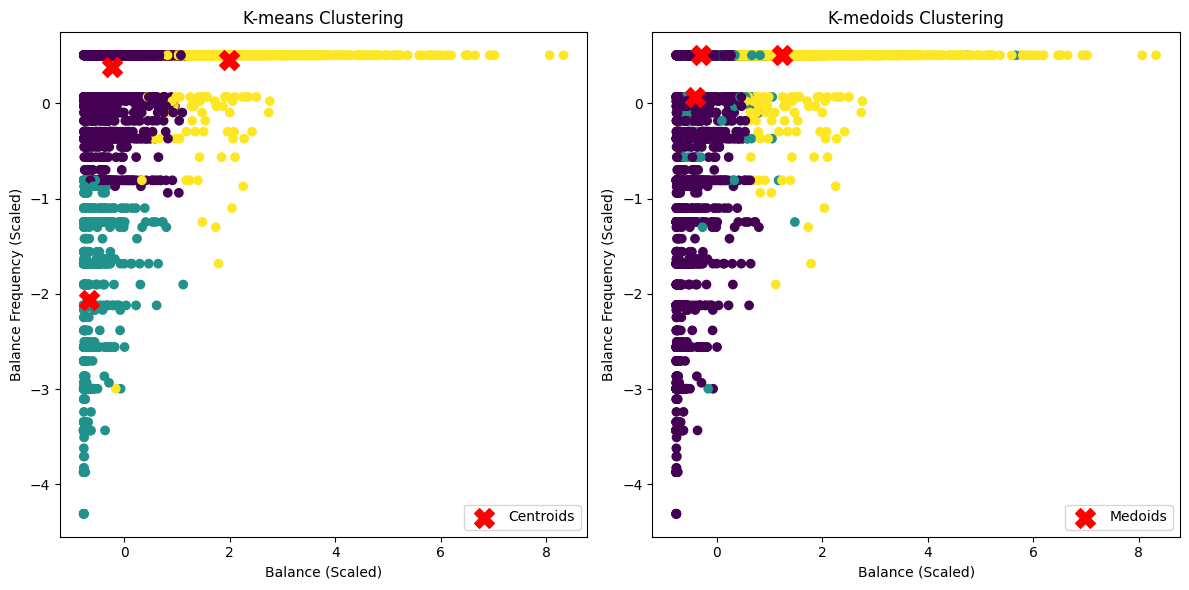

In [14]:
# Visualization of K-means and K-medoids Clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Balance (Scaled)')
plt.ylabel('Balance Frequency (Scaled)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids_labels, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Balance (Scaled)')
plt.ylabel('Balance Frequency (Scaled)')
plt.legend()

plt.tight_layout()
plt.show()